# Подключение библиотек

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import measure

# Общий код

In [22]:
IMAGE_PATH = 'assets/TestContours.jpg'

# OpenCV

(2706,)


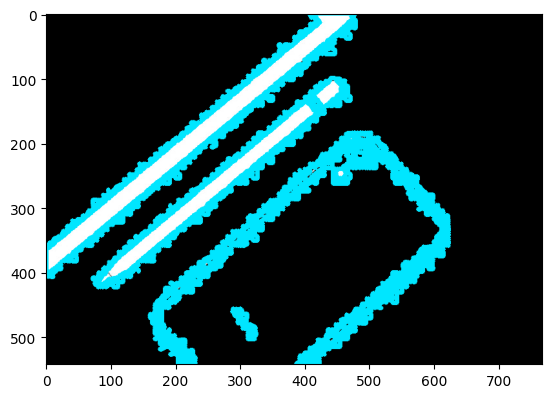

In [64]:
image = cv2.imread(IMAGE_PATH, cv2.IMREAD_GRAYSCALE)

def open_cv_find_contours():
    return cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

contours, _ = open_cv_find_contours()

contours = np.array(contours, dtype=object)
print(contours.shape)

im = np.expand_dims(image, axis=2).repeat(3, axis=2)
for k, _ in enumerate(contours):
    im = cv2.drawContours(im, contours, k, (0, 230, 255), 6)
plt.imshow(im)

# Scikit-Image

(1790,)


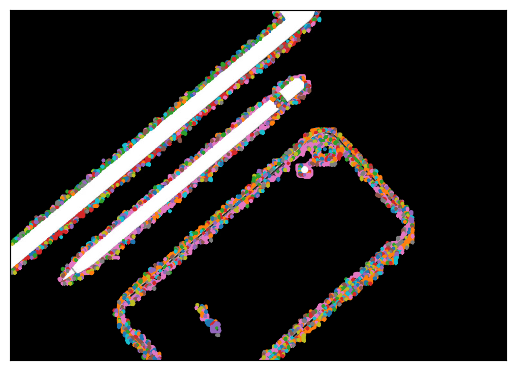

In [63]:
import skimage.io as io

image = io.imread(IMAGE_PATH, as_gray=True)

def scikit_find_contours():
    return measure.find_contours(image, 1)

contours = scikit_find_contours()

contours = np.array(contours, dtype=object)
print(contours.shape)

fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

# Тест

In [65]:
import time

COUNT_LAUNCHES = 1000


def test_time(func):
    results = np.empty(COUNT_LAUNCHES)
    for i in range(COUNT_LAUNCHES):
        start_time = time.time()
        func()
        results[i] = time.time() - start_time

    # вычисляем среднее время
    avg_time = np.mean(results)
    print(f"Среднее время выполнения функции {func.__name__}: {avg_time * 1000.0:.2f} ms")


test_time(open_cv_find_contours)
test_time(scikit_find_contours)

Среднее время выполнения функции open_cv_find_contours: 3.17 ms
Среднее время выполнения функции scikit_find_contours: 36.39 ms
